In [1]:
# Imports
import numpy as np             
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [2]:
# Read csv file into dataframe (df)
try:
    df = pd.read_csv('./BDU.csv')
except FileNotFoundError:
    print('Data file not found')

In [3]:
# Drop missing values "M"
df.replace("M", np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

In [4]:
# Predicted variable (tmpf) set to categorical integer
df['tmpf'] = df['tmpf'].astype(float).astype(int)

# Convert strings to float
df['relh'] = df['relh'].astype(float)
df['drct'] = df['drct'].astype(float)
df['sped'] = df['sped'].astype(float)

# Split time into hour, day, month, year for ML 
df['time'] = pd.to_datetime(df['valid'], format = '%Y-%m-%d %H:%M')
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['day'] = df['time'].dt.day

# Set index to time
df.index = df.time
df.drop(columns=['valid', 'time'], inplace = True)

df

,station,tmpf,relh,drct,sped,hour,month,year,day
time,,,,,,,,,
2011-01-01 00:16:00,BDU,8,71.92,180.0,4.60,0,1,2011,1
2011-01-01 00:36:00,BDU,8,66.11,160.0,3.45,0,1,2011,1
2011-01-01 00:56:00,BDU,8,71.92,80.0,3.45,0,1,2011,1
2011-01-01 01:16:00,BDU,8,71.92,150.0,3.45,1,1,2011,1
2011-01-01 01:56:00,BDU,8,71.92,120.0,3.45,1,1,2011,1
...,...,...,...,...,...,...,...,...,...
2020-12-30 22:35:00,BDU,33,43.65,360.0,4.60,22,12,2020,30
2020-12-30 22:55:00,BDU,33,43.65,10.0,5.75,22,12,2020,30
2020-12-30 23:15:00,BDU,32,46.92,0.0,0.00,23,12,2020,30


In [5]:
# X are the features, y is the predicted category (integer temperature)
X = df[['relh', 'drct', 'sped', 'hour', 'month', 'year', 'day']]
y = df['tmpf']

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Create random forest classifer object
clf = RandomForestClassifier(random_state=0)

# Train random forest
clf = clf.fit(X_train, y_train)

# Predict from the test dataset 
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6013753292430958


Text(0.5, 1.0, 'ASOS mean = 52.02$^\\circ$F and $\\sigma$ = 18.97$^\\circ$F \n ML mean = 51.96$^\\circ$F and $\\sigma$ = 18.88$^\\circ$F')

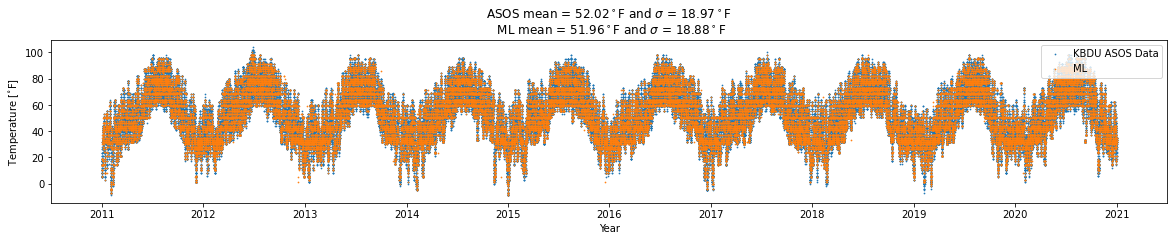

In [9]:
# Plot all temperature data (10 years) and the ML prediction
fig, ax = plt.subplots(figsize=(20,3))

ax.scatter(df.index, df['tmpf'], color='C0', s=0.5, label='KBDU ASOS Data')
ax.scatter(y_test.index, y_pred, color='C1', s=0.5, label='ML')
ax.set_ylabel(r'Temperature [$^{\circ}$F]')
ax.set_xlabel('Year')
ax.legend(loc='upper right')
ax.set_title('ASOS mean = {0}$^\circ$F and $\sigma$ = {1}$^\circ$F \n ML mean = {2}$^\circ$F \
and $\sigma$ = {3}$^\circ$F'.format(round(df.tmpf.mean(),2), round(df.tmpf.std(),2), round(np.mean(y_pred),2), round(np.std(y_pred),2)))